<a href="https://colab.research.google.com/github/MikoFahreza/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Miko Yusrizal Fahreza

NIM: 2141720083

No. Absen: 17

Kelas: TI-3B

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan
transformasi linier brightness adalah sebagai berikut:
𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏
dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google
colab:

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


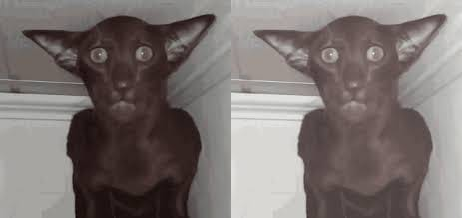

In [8]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/nigcat.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **TUGAS PRAKTIKUM**
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


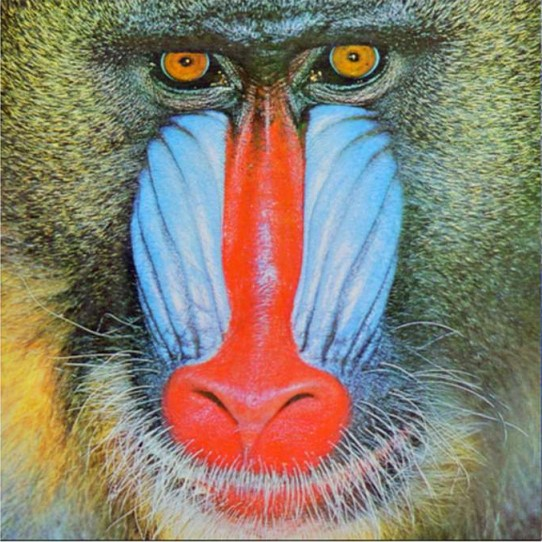

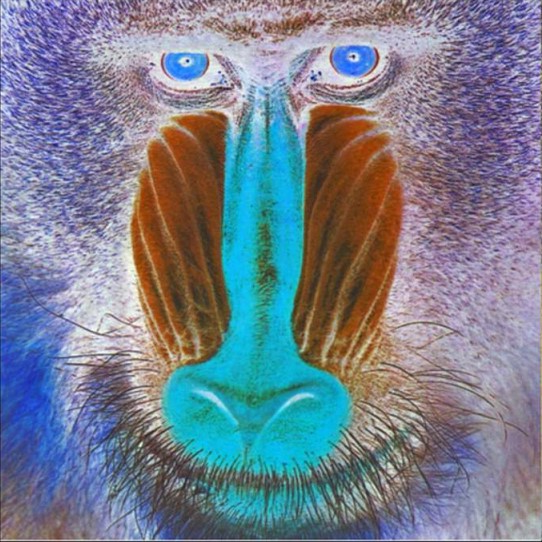

In [12]:
original = cv.imread('/content/drive/MyDrive/PCVK/images/monkey.jpg')

inverted_image = 255 - original

# Menampilkan gambar asli dan gambar inversi
cv2_imshow(original)
cv2_imshow(inverted_image)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


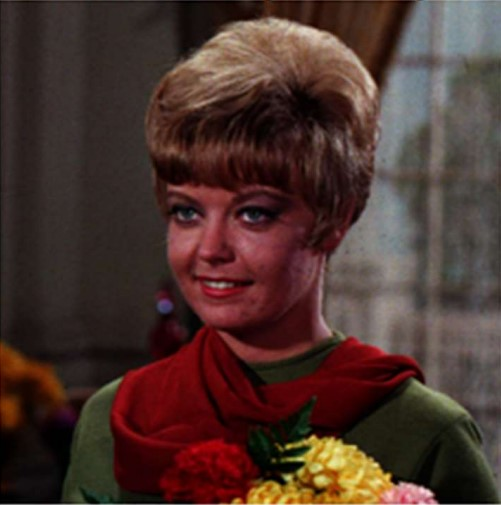

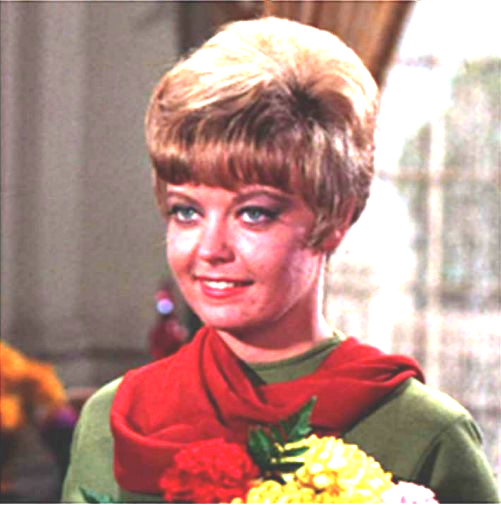

In [20]:
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')

transformed_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Menampilkan gambar asli dan gambar dengan kontras yang ditingkatkan
cv2_imshow(original)
cv2_imshow(transformed_image)


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:


Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------
Masukkan nilai kecerahan: 50


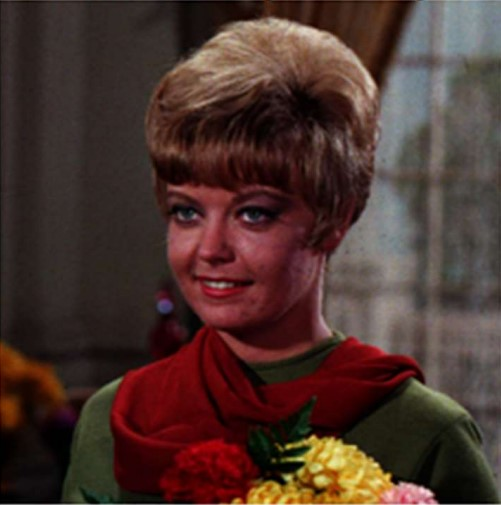

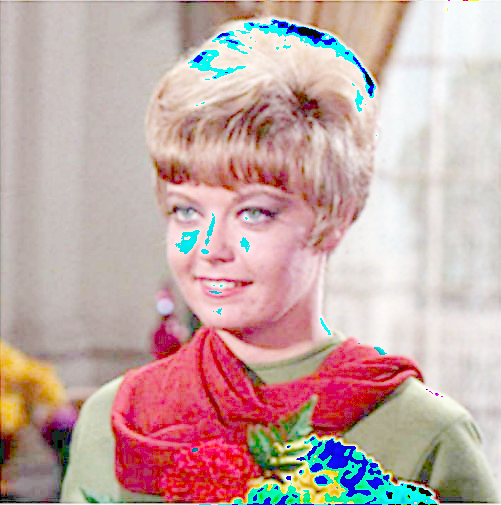

In [22]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

image = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')

#gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Menentukan faktor transformasi log (0.1 adalah contoh nilai, sesuaikan)
log_transform_factor = brightness

# Melakukan transformasi log pada citra grayscale
log_transformed_image = np.uint8(np.log1p(image) * log_transform_factor)

# Menampilkan gambar asli dan gambar dengan transformasi log
cv2_imshow(image)
cv2_imshow(log_transformed_image)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Transformasi ke Grayscale secara Manual (Average, Lightness, Luminance)
---------------------------------------------------------------------


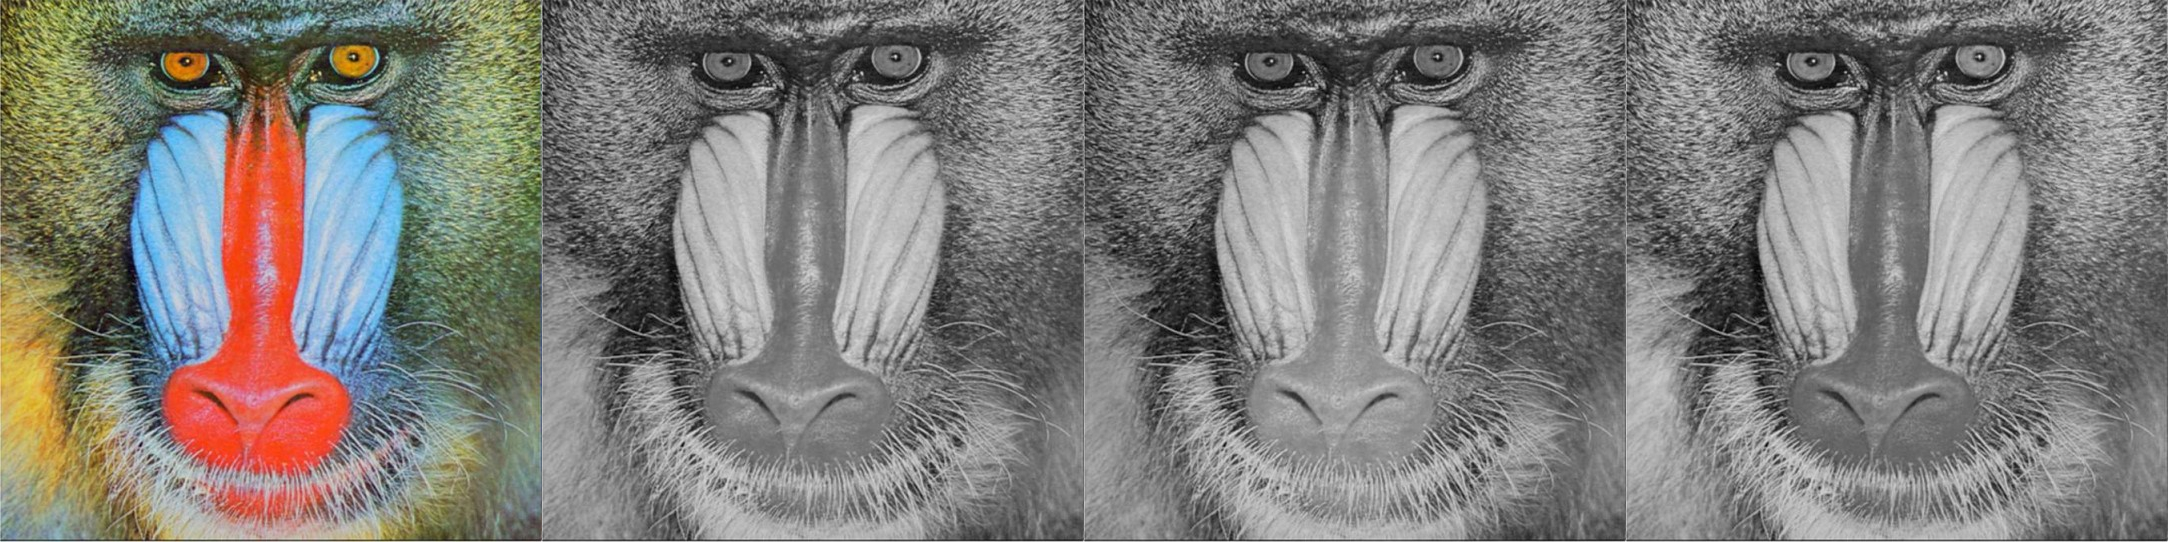

In [35]:
print('Transformasi ke Grayscale secara Manual (Average, Lightness, Luminance)')
print('---------------------------------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/images/monkey.jpg')

height, width, _ = original.shape

gray_average = np.zeros((height, width), dtype=np.uint8)
gray_lightness = np.zeros((height, width), dtype=np.uint8)
gray_luminance = np.zeros((height, width), dtype=np.uint8)

for y in range(height):
    for x in range(width):
        b, g, r = original[y, x]

        gray_value_average = int((int(r) + int(g) + int(b)) / 3)
        gray_average[y, x] = gray_value_average

        gray_value_lightness = int((max(int(r), int(g), int(b)) + min(int(r), int(g), int(b))) / 2)
        gray_lightness[y, x] = gray_value_lightness

        gray_value_luminance = int(0.21 * r + 0.72 * g + 0.07 * b)
        gray_luminance[y, x] = gray_value_luminance

final_frame = cv.hconcat([original, cv.cvtColor(gray_average, cv.COLOR_GRAY2BGR), cv.cvtColor(gray_lightness, cv.COLOR_GRAY2BGR), cv.cvtColor(gray_luminance, cv.COLOR_GRAY2BGR)])
cv2_imshow(final_frame)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:


Menampilkan Warna Biru dan Mengubah yang Lain menjadi Abu-abu
-----------------------------------------------------------


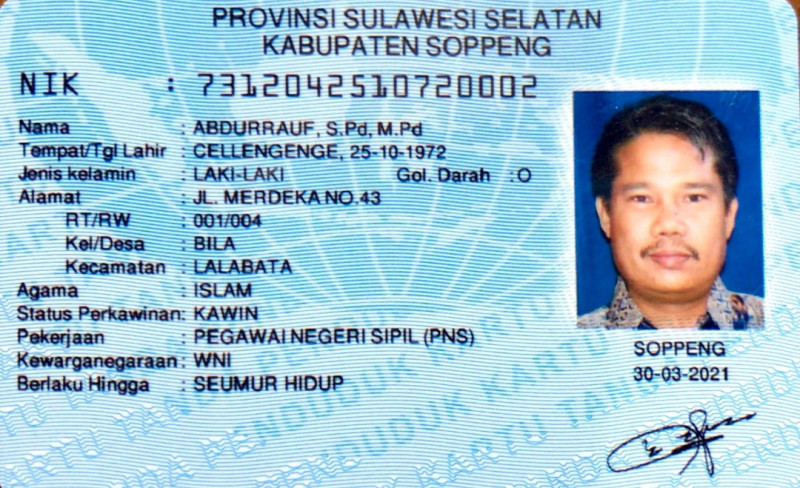

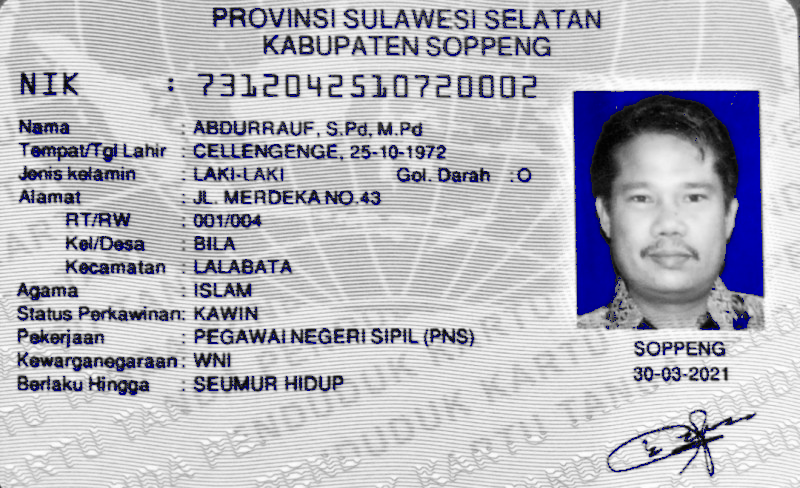

In [39]:
import cv2 as cv
from google.colab.patches import cv2_imshow

print('Menampilkan Warna Biru dan Mengubah yang Lain menjadi Abu-abu')
print('-----------------------------------------------------------')

# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpeg')

# Menentukan batas warna biru dalam format BGR
lower_blue = np.array([100, 0, 0], dtype=np.uint8)
upper_blue = np.array([255, 100, 100], dtype=np.uint8)

# Membuat mask untuk warna biru
mask_blue = cv.inRange(original, lower_blue, upper_blue)

# Mengonversi gambar asli ke skala abu-abu
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Menampilkan saluran biru dalam gambar asli
blue_channel = original.copy()
blue_channel[:, :, 1] = 0  # Saluran hijau menjadi 0
blue_channel[:, :, 2] = 0  # Saluran merah menjadi 0

# Menggunakan mask untuk menggabungkan saluran biru dengan gambar asli
result = cv.bitwise_and(blue_channel, blue_channel, mask=mask_blue)

# Menggabungkan saluran biru dengan gambar skala abu-abu
result_gray = cv.bitwise_and(gray, gray, mask=cv.bitwise_not(mask_blue))

# Menggabungkan gambar biru dengan gambar abu-abu
result_final = cv.add(result, cv.cvtColor(result_gray, cv.COLOR_GRAY2BGR))

# Menampilkan gambar hasil
cv2_imshow(original)
cv2_imshow(result_final)